# Socio-Academic Evaluation of Student Alcohol Use by Investigating Behavioural Roots and Consequences

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'Datasets/alcohol_impact_dataset.csv')
df

,weekly_alcohol_hours,social_events_per_week,study_hours_per_week,sleep_hours_per_night,stress_level,academic_outcome
0,0.168781,1.233807,0.799134,-0.002455,1.845764,0
1,-2.295020,1.306530,1.724324,0.203136,0.799842,0
2,-0.604085,-0.616336,0.097299,0.590089,0.391630,1
3,0.809984,-0.991216,-0.681218,0.027227,-0.204549,1
4,-1.335521,-1.801725,2.507519,-1.823245,1.326508,1
...,...,...,...,...,...,...
995,0.149176,-1.103748,-1.058602,-0.180894,-2.296767,0
996,-1.101701,-0.235431,1.139614,-1.117096,-0.638240,0
997,-0.715706,0.501286,3.493893,-2.323410,3.280411,0
998,1.176546,0.768030,-1.853346,1.178682,-0.879747,1


In [6]:
print("\n--- Exploratory Data Analysis ---")
df.head()


--- Exploratory Data Analysis ---


,weekly_alcohol_hours,social_events_per_week,study_hours_per_week,sleep_hours_per_night,stress_level,academic_outcome
0,0.168781,1.233807,0.799134,-0.002455,1.845764,0
1,-2.295020,1.306530,1.724324,0.203136,0.799842,0
2,-0.604085,-0.616336,0.097299,0.590089,0.391630,1
3,0.809984,-0.991216,-0.681218,0.027227,-0.204549,1
4,-1.335521,-1.801725,2.507519,-1.823245,1.326508,1


In [7]:
print(df.info())
print("\nDescriptive Statistics:")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weekly_alcohol_hours    1000 non-null   float64
 1   social_events_per_week  1000 non-null   float64
 2   study_hours_per_week    1000 non-null   float64
 3   sleep_hours_per_night   1000 non-null   float64
 4   stress_level            1000 non-null   float64
 5   academic_outcome        1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB
None

Descriptive Statistics:


,weekly_alcohol_hours,social_events_per_week,study_hours_per_week,sleep_hours_per_night,stress_level,academic_outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.517359,0.051640,0.662643,-0.512000,-0.017116,0.498000
std,1.317015,1.562531,1.874774,1.379208,1.556033,0.500246
min,-4.843622,-4.653281,-5.024941,-4.530188,-4.947865,0.000000
25%,-1.337195,-1.069539,-0.699613,-1.448377,-1.094200,0.000000
50%,-0.665048,0.080176,1.032314,-0.634875,0.348773,0.000000
75%,0.278863,1.151741,2.063192,0.287785,1.128657,1.000000
max,3.592980,5.090814,5.663414,3.789293,4.229655,1.000000


In [8]:
df.isnull().sum()

weekly_alcohol_hours      0
social_events_per_week    0
study_hours_per_week      0
sleep_hours_per_night     0
stress_level              0
academic_outcome          0
dtype: int64

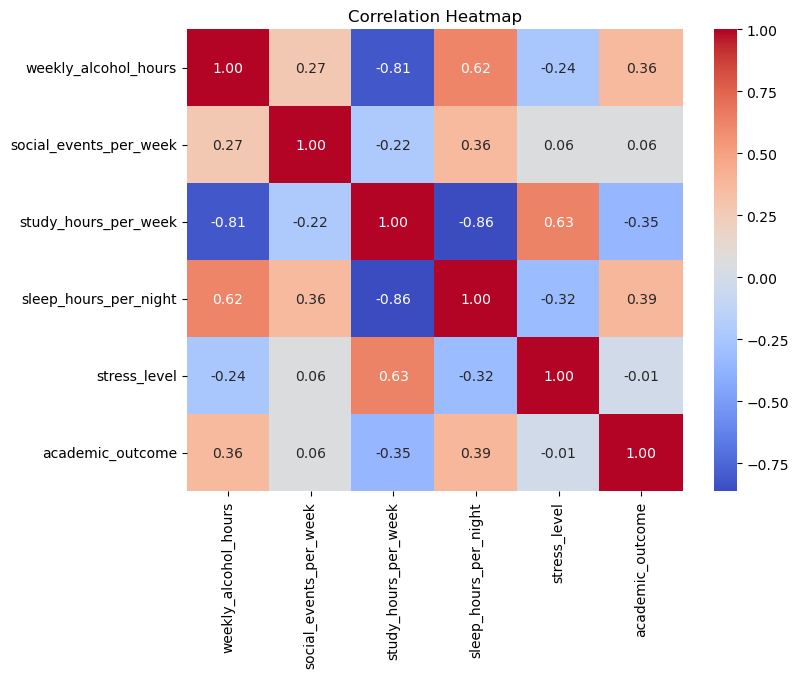

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
df = df.dropna()  # Drop any missing values if they existed
df

,weekly_alcohol_hours,social_events_per_week,study_hours_per_week,sleep_hours_per_night,stress_level,academic_outcome
0,0.168781,1.233807,0.799134,-0.002455,1.845764,0
1,-2.295020,1.306530,1.724324,0.203136,0.799842,0
2,-0.604085,-0.616336,0.097299,0.590089,0.391630,1
3,0.809984,-0.991216,-0.681218,0.027227,-0.204549,1
4,-1.335521,-1.801725,2.507519,-1.823245,1.326508,1
...,...,...,...,...,...,...
995,0.149176,-1.103748,-1.058602,-0.180894,-2.296767,0
996,-1.101701,-0.235431,1.139614,-1.117096,-0.638240,0
997,-0.715706,0.501286,3.493893,-2.323410,3.280411,0
998,1.176546,0.768030,-1.853346,1.178682,-0.879747,1


In [11]:
X = df.drop('academic_outcome', axis=1)
y = df['academic_outcome']
X

,weekly_alcohol_hours,social_events_per_week,study_hours_per_week,sleep_hours_per_night,stress_level
0,0.168781,1.233807,0.799134,-0.002455,1.845764
1,-2.295020,1.306530,1.724324,0.203136,0.799842
2,-0.604085,-0.616336,0.097299,0.590089,0.391630
3,0.809984,-0.991216,-0.681218,0.027227,-0.204549
4,-1.335521,-1.801725,2.507519,-1.823245,1.326508
...,...,...,...,...,...
995,0.149176,-1.103748,-1.058602,-0.180894,-2.296767
996,-1.101701,-0.235431,1.139614,-1.117096,-0.638240
997,-0.715706,0.501286,3.493893,-2.323410,3.280411
998,1.176546,0.768030,-1.853346,1.178682,-0.879747


In [12]:
y

0      0
1      0
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: academic_outcome, Length: 1000, dtype: int64

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Step 4: Data Splitting (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("\nData split: 80% train, 20% test")


Data split: 80% train, 20% test


In [15]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Gaussian Naive Bayes (GNB)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

In [16]:
# Step 6: Model Testing and Performance Metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
#    return y_pred


--- SVM Performance ---
Accuracy: 0.9150
Precision: 0.9381
Recall: 0.8922
F1-Score: 0.9146


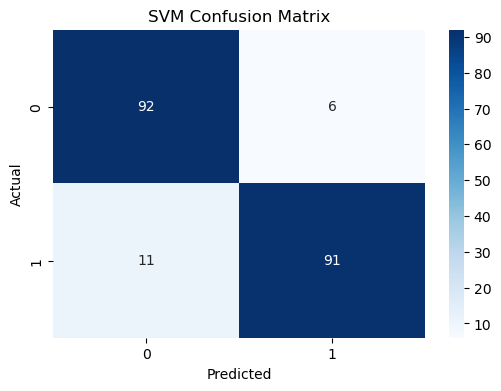

In [17]:
svm_pred = evaluate_model(svm_model, X_test, y_test, "SVM")


--- Gaussian Naive Bayes Performance ---
Accuracy: 0.6050
Precision: 0.6575
Recall: 0.4706
F1-Score: 0.5486


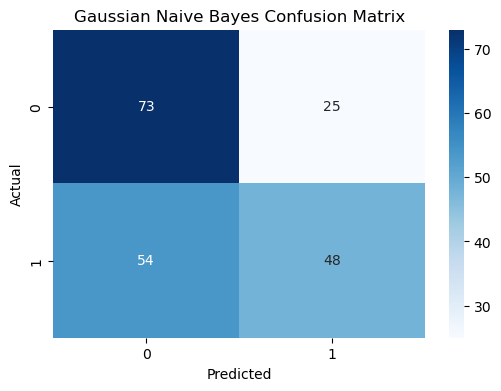

In [18]:
gnb_pred = evaluate_model(gnb_model, X_test, y_test, "Gaussian Naive Bayes")



--- CatBoost Performance ---
Accuracy: 0.9200
Precision: 0.9479
Recall: 0.8922
F1-Score: 0.9192


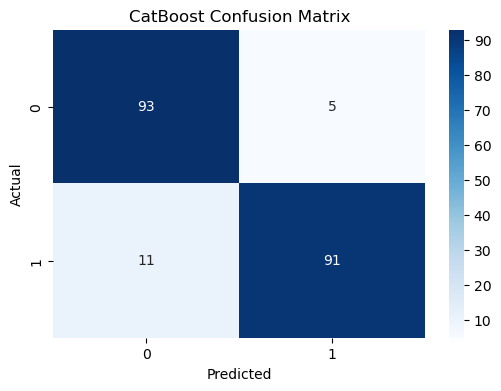

In [19]:
catboost_pred = evaluate_model(catboost_model, X_test, y_test, "CatBoost")

## Proposed Model Predication on Input Test Data

In [20]:
test = pd.read_csv('Datasets/test.csv')
test

,weekly_alcohol_hours,social_events_per_week,study_hours_per_week,sleep_hours_per_night,stress_level
0,-1.314950,1.630071,0.833710,0.699659,0.859322
1,0.808725,1.732966,-2.318244,2.292359,-0.897065
2,0.134814,-1.333192,-0.054297,-0.007774,0.280629
3,-0.988411,-0.872251,0.278942,-0.738107,-1.746769
4,0.862836,-0.329271,-0.220587,-1.745748,-1.937305
5,-1.565182,0.621762,1.847685,-0.913232,0.495010
6,1.657958,1.243574,-2.116562,1.517070,-0.360747
7,-0.330248,1.055995,0.603007,-0.956470,-0.749384
8,0.493310,1.737742,0.372763,0.740195,2.393246
9,0.911343,1.573681,-1.764193,0.416648,-2.366013


In [21]:
testdata = scaler.transform(test)

In [22]:
Predict = catboost_model.predict(testdata)
Predict

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [23]:
test['Predictions'] = Predict
test

,weekly_alcohol_hours,social_events_per_week,study_hours_per_week,sleep_hours_per_night,stress_level,Predictions
0,-1.314950,1.630071,0.833710,0.699659,0.859322,1
1,0.808725,1.732966,-2.318244,2.292359,-0.897065,1
2,0.134814,-1.333192,-0.054297,-0.007774,0.280629,1
3,-0.988411,-0.872251,0.278942,-0.738107,-1.746769,0
4,0.862836,-0.329271,-0.220587,-1.745748,-1.937305,1
5,-1.565182,0.621762,1.847685,-0.913232,0.495010,0
6,1.657958,1.243574,-2.116562,1.517070,-0.360747,1
7,-0.330248,1.055995,0.603007,-0.956470,-0.749384,0
8,0.493310,1.737742,0.372763,0.740195,2.393246,0
9,0.911343,1.573681,-1.764193,0.416648,-2.366013,1
